In [6]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [7]:
num = pd.read_csv('numerical.csv')
cat = pd.read_csv('categorical.csv')
target = pd.read_csv('target.csv')

In [8]:
cat.dtypes

STATE           object
CLUSTER          int64
HOMEOWNR        object
GENDER          object
DATASRCE         int64
RFA_2R          object
RFA_2A          object
GEOCODE2        object
DOMAIN_A        object
DOMAIN_B         int64
ODATEW_YR        int64
ODATEW_MM        int64
DOB_YR           int64
DOB_MM           int64
MINRDATE_YR      int64
MINRDATE_MM      int64
MAXRDATE_YR      int64
MAXRDATE_MM      int64
LASTDATE_YR      int64
LASTDATE_MM      int64
FIRSTDATE_YR     int64
FIRSTDATE_MM     int64
dtype: object

In [9]:
y_class = target['TARGET_B']
y_regr = target['TARGET_D']

In [10]:
y_class

0        0
1        0
2        0
3        0
4        0
        ..
95407    0
95408    0
95409    0
95410    1
95411    0
Name: TARGET_B, Length: 95412, dtype: int64

In [11]:
# Encode the categorical variables.
columns_to_encode = list(cat.columns)
categorical_encoded = pd.get_dummies(cat[columns_to_encode])

In [12]:
# Merge categorical and numerical
X = pd.concat([num, categorical_encoded], axis=1)
X

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,CLUSTER,DATASRCE,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,STATE_CA,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,HOMEOWNR_H,HOMEOWNR_U,GENDER_F,GENDER_M,GENDER_other,RFA_2R_L,RFA_2A_D,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_A,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_C,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,0,60.000000,5,9,0,0,39,34,18,10,2,1,5,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,240.0,31,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39,36,3,2,89,1,37,12,92,8,94,2,95,12,89,11,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0
1,1,46.000000,6,9,16,0,15,55,11,6,2,1,9,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,32,6,13,47.0,3,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1,14,3,1,9

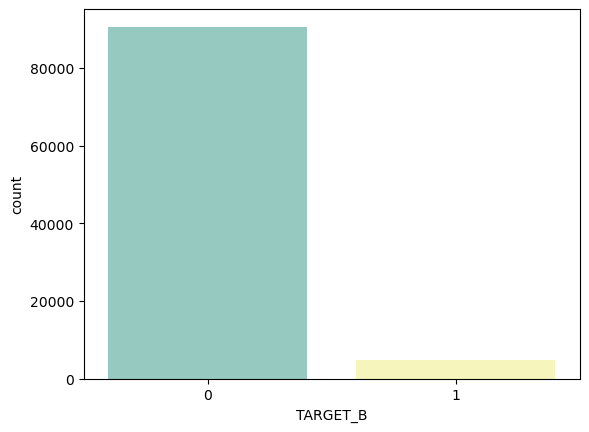

In [13]:
import seaborn as sns
# Check for imbalance and apply SMOTE
sns.countplot(x = y_class, data = X, palette = 'Set3')
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y_class)

<Axes: xlabel='TARGET_B', ylabel='count'>

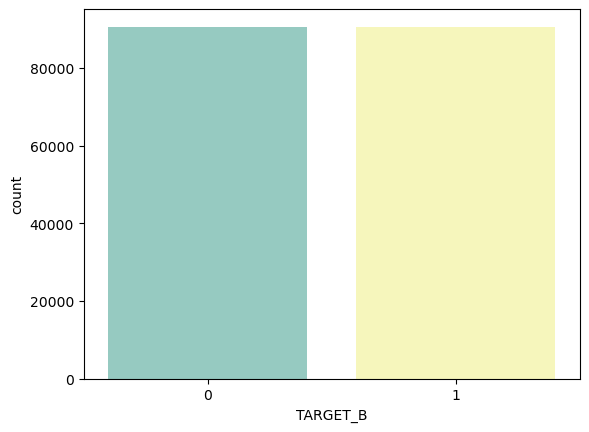

In [14]:
sns.countplot(x = y_sm, data = X_sm, palette = 'Set3')

In [15]:
# Split the data into Train / Test

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=100)

In [16]:
y_test

19121     0
115745    1
177664    1
69605     0
21147     0
         ..
37931     0
135112    1
119120    1
10165     0
170629    1
Name: TARGET_B, Length: 36228, dtype: int64

In [17]:
# Train Random Forest Classifier

clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
r2 = clf.score(X_test,y_test)
print("R2 Score (Random Forest Classifier):", r2)

R2 Score (Random Forest Classifier): 0.97488130727614


In [ ]:
# Hyperparameter tunning (Grid Search)
from sklearn.model_selection import GridSearchCV

n_estimators = [200, 500, 1000, 2000, 4000]
min_samples_split = [2, 4, 8, 16, 32]
min_samples_leaf = [1, 2, 3, 4, 5]
max_features = ['sqrt', 'log2']
max_samples = ['None', 0.5, 0.8]

param_grid = {
    'n_estimators': [50,100],
    'min_samples_split': [2,4],
    'min_samples_leaf':[1,2]   
}

grid_search = GridSearchCV(clf,param_grid,cv=5,return_train_score=True)
grid_search.fit(X_train,y_train)
grid_search.best_params_

In [18]:
# Re-run Random Forrest Classifier using recommended hyperparameters
clf2 = RandomForestClassifier(n_estimators= 100, min_samples_leaf=1, min_samples_split=2, random_state=0)
clf2.fit(X_train, y_train)
r2 = clf2.score(X_test,y_test)
print("R2 Score (Random Forest Classifier):", r2)

R2 Score (Random Forest Classifier): 0.97488130727614


In [19]:
# Feature Importance
clf.fit(X_train, y_train)
X_train.head()
feature_names = X_train.columns
feature_names = list(feature_names)
df = pd.DataFrame(list(zip(feature_names, clf.feature_importances_)))
df.columns = ['columns_name', 'score_feature_importance']
sorted = df.sort_values(by=['score_feature_importance'], ascending = False)
sorted.head(10)

,columns_name,score_feature_importance
350,RFA_2A_F,0.037059
351,RFA_2A_G,0.029825
345,GENDER_M,0.029445
344,GENDER_F,0.026200
308,LASTGIFT,0.023195
349,RFA_2A_E,0.021086
307,MAXRAMNT,0.018583
312,HPHONE_D,0.017092
325,MAXRDATE_MM,0.016998
327,LASTDATE_MM,0.016797
